In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
path ="/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv"
data = pd.read_csv(path)
print("first ten rows:\n")
data.head(10)

first ten rows:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [3]:
rows, columns = data.shape

# Print the result
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 143
Number of columns: 9


In [6]:
data.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**Basic** **Stasistics**

In [11]:
# 1. Calculate the mean, median, and standard deviation for the Score column

if 'score' in data.columns:
  mean_score = data['score'].mean()
  median_score = data['score'].median()
  std_dev_score = data['score'].std()

  #printing results
  print(f"Mean of Score: {mean_score}")
  print(f"Median of Score: {median_score}")
  print(f"Standard Deviation of Score: {std_dev_score}")
else:
  print("Score not found")



Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [13]:
#2. Identify the country with the highest and lowest happiness scores.


highest_score_country = data.loc[data['score'].idxmax()]
lowest_score_country = data.loc[data['score'].idxmin()]

# Printing the score
print(f"Country with highest happiness score: {highest_score_country['Country name']}, Score: {highest_score_country['score']}")
print(f"Country with lowest happiness score: {lowest_score_country['Country name']}, Score: {lowest_score_country['score']}")


Country with highest happiness score: Finland, Score: 7.741
Country with lowest happiness score: Afghanistan, Score: 1.721


**Missing Values**

In [14]:
#1. Check if there are any missing values in the dataset. If so, display the total count for each column.



# Check for missing values and display the count for each column
missing_values = data.isnull().sum()

# Display the result
print("Missing values count for each column:\n")
print(missing_values)


Missing values count for each column:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and sorting**

In [18]:
filtered_data = data[data['score'] > 7.5]

# Display the filtered dataset
print("Filtered dataset (Score > 7.5):\n")
print(filtered_data)


Filtered dataset (Score > 7.5):

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [21]:
#. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display the top 10 rows

# Sort the filtered dataset by GDP per Capita in descending order
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows
top_10_data = sorted_data.head(10)

# Print the top 10 rows
print("Top 10 rows sorted by GDP per Capita:\n")
print(top_10_data)


Top 10 rows sorted by GDP per Capita:

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding new Column**

In [24]:
possibleconditions = [
    (data['score'] < 4),
    (data['score'] >= 4) & (data['score'] <= 6),
    (data['score'] > 6)
]

choices = ['Low', 'Medium', 'High']

# Create the new column 'Happiness Category'
data['Happiness Category'] = np.select(possibleconditions, choices, default='Unknown')

# Display the updated dataset
print(data[['Country name', 'score', 'Happiness Category']].head())

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


**Data visualizations**

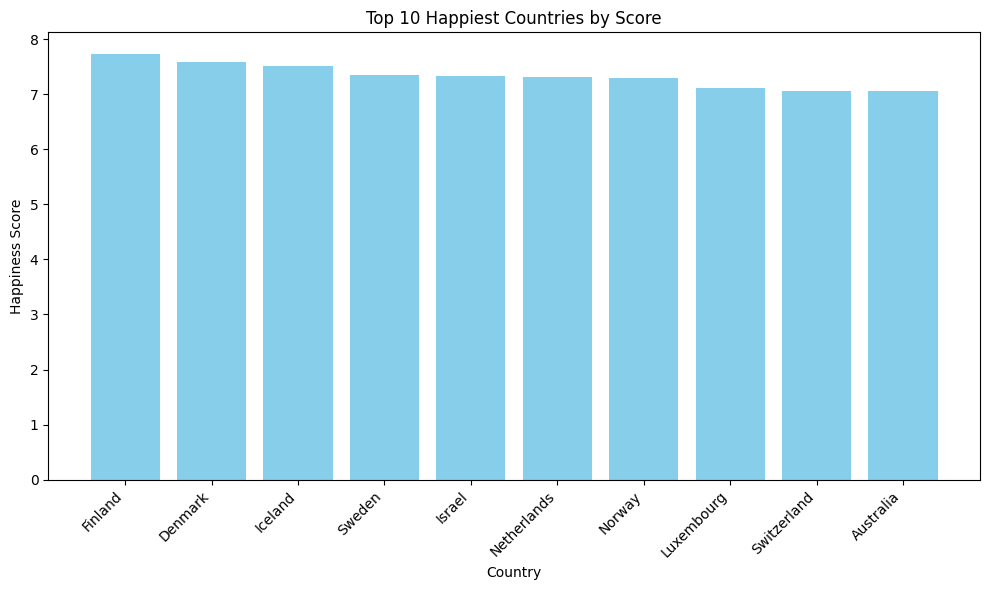

In [26]:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart

top_10_happiest = data.sort_values(by='score', ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')

# Adding title and labels
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

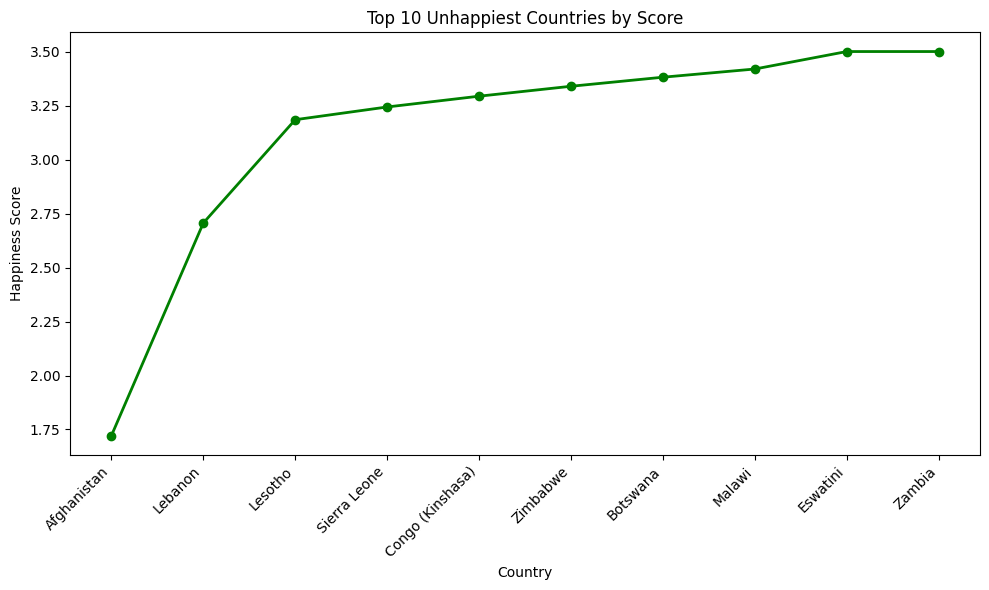

In [34]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='green', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

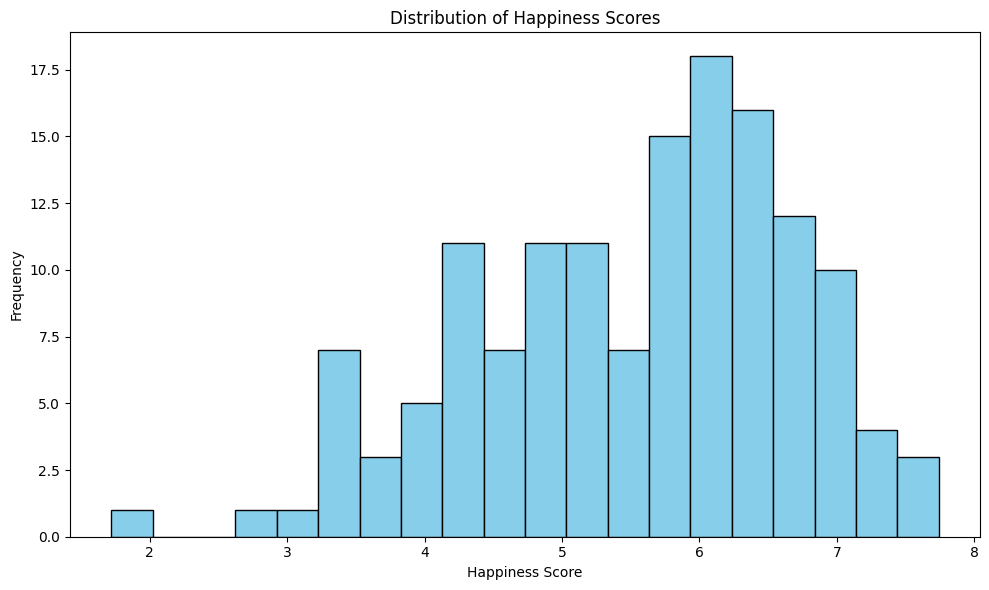

In [35]:
#Plot a histogram for the Score column to show its distribution and also interpret

plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

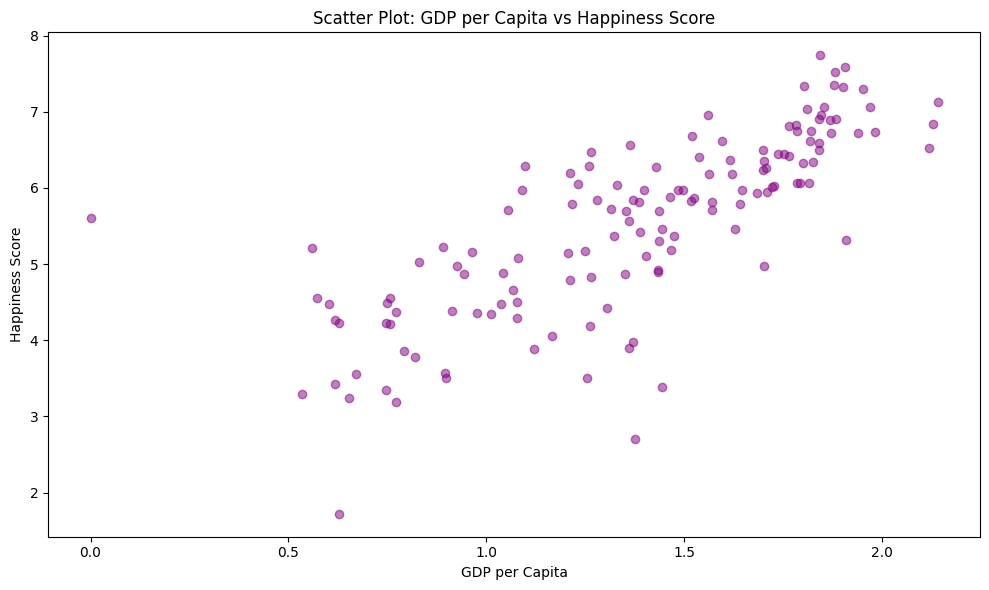

In [38]:
#  Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='purple', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

# Display the plot
plt.tight_layout()
plt.show()

** Problem- 2- Some Advance Data Exploration Task**

In [53]:
# Step 1: Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
south_asian_data = data[data['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a CSV file
south_asian_data.to_csv('/content/drive/MyDrive/Dataset/south_asian_countries.csv', index=False)
print(south_asian_data)

# Print confirmation
print("Filtered South Asian dataset saved as 'south_asian_countries.csv'")



    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

** Task- 2- Composite Score Ranking**

In [44]:
# Create a new column 'Composite Score' in the SouthAsian DataFrame
south_asian_data['Composite Score'] = 0.40 * south_asian_data['Log GDP per capita'] + \
                                       0.30 * south_asian_data['Social support'] + \
                                       0.30 * south_asian_data['Healthy life expectancy']

# Display the updated dataframe with the new column
print(south_asian_data[['Country name', 'Composite Score']].head())


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774


<ipython-input-44-5f088496bed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['Composite Score'] = 0.40 * south_asian_data['Log GDP per capita'] + \


In [46]:
#  Rank the South Asian countries based on the Composite Score in descending order

# Sort the dataframe by 'Composite Score' in descending order
ranked_south_asian_data = south_asian_data.sort_values(by='Composite Score', ascending=False)

# Display the ranked data
print(ranked_south_asian_data[['Country name', 'Composite Score']])


    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


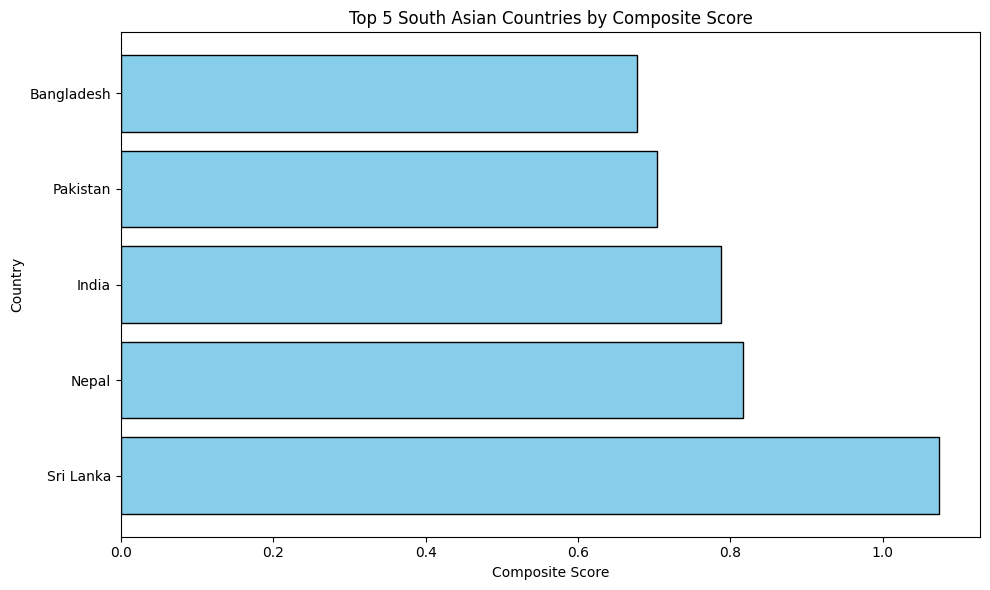

In [47]:
#Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

top_5_south_asian = south_asian_data.sort_values(by='Composite Score', ascending=False).head(5)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_south_asian['Country name'], top_5_south_asian['Composite Score'], color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')

# Display the plot
plt.tight_layout()
plt.show()

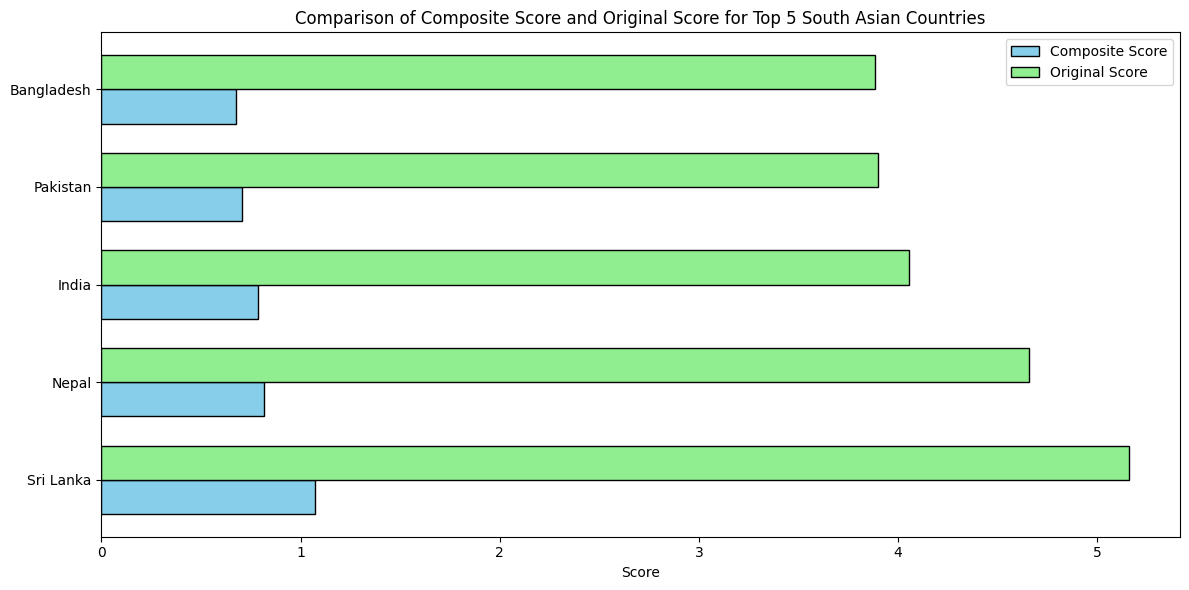

In [48]:
# Discuss whether the rankings based on the Composite Score align with the original Score- support your discussion with some visualization plot

top_5_composite = south_asian_data.sort_values(by='Composite Score', ascending=False).head(5)
top_5_score = south_asian_data.sort_values(by='score', ascending=False).head(5)

# Prepare data for side-by-side bar chart
countries = top_5_composite['Country name']
composite_scores = top_5_composite['Composite Score']
original_scores = top_5_score['score']

# Create the side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
index = range(len(countries))

# Plotting the Composite Scores and Original Scores
ax.barh(index, composite_scores, bar_width, label='Composite Score', color='skyblue', edgecolor='black')
ax.barh([i + bar_width for i in index], original_scores, bar_width, label='Original Score', color='lightgreen', edgecolor='black')

# Add labels and title
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(countries)
ax.set_xlabel('Score')
ax.set_title('Comparison of Composite Score and Original Score for Top 5 South Asian Countries')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

** Task- 3- Outlier Detection**

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Score' and 'GDP per Capita'
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define the lower and upper bounds for outliers
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers for 'Score' and 'GDP per Capita'
outliers_score = south_asian_data[(south_asian_data['score'] < lower_bound_score) | (south_asian_data['score'] > upper_bound_score)]
outliers_gdp = south_asian_data[(south_asian_data['Log GDP per capita'] < lower_bound_gdp) | (south_asian_data['Log GDP per capita'] > upper_bound_gdp)]

# Combine the outliers from both criteria
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

# Display the outliers
print("Outlier countries")
print(outliers)


Outlier countries
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
142                      0.088                0.672                Low  


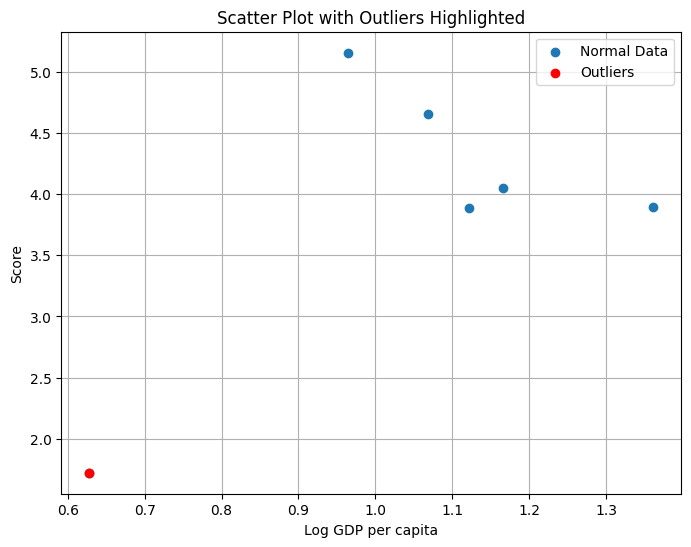

In [56]:
# 3 Scatter plot with outliers highlighted
plt.figure(figsize=(8, 6))
plt.scatter(south_asian_data['Log GDP per capita'], south_asian_data['score'], label='Normal Data')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

By visualizing the scatter plot with highlighted outliers, you can easily identify which countries deviate significantly from the rest. The discussion on their potential impact helps in understanding how they could affect regional averages and may highlight the need to analyze regional trends without the influence of extreme outliers.

**Task 4  Exploring Trends Across Metrics**

In [58]:
# Select the relevant columns
columns_of_interest = ['score', 'Freedom to make life choices', 'Generosity']

# Extract data for correlation
south_asian_data_subset = south_asian_data[columns_of_interest]

# Calculate the Pearson correlation
correlation_freedom = south_asian_data_subset['score'].corr(south_asian_data_subset['Freedom to make life choices'], method="pearson")
correlation_generosity = south_asian_data_subset['score'].corr(south_asian_data_subset['Generosity'], method="pearson")

# Print the results
print(f"Pearson Correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Pearson Correlation between Score and Generosity: {correlation_generosity}")


Pearson Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Pearson Correlation between Score and Generosity: 0.874512371253192


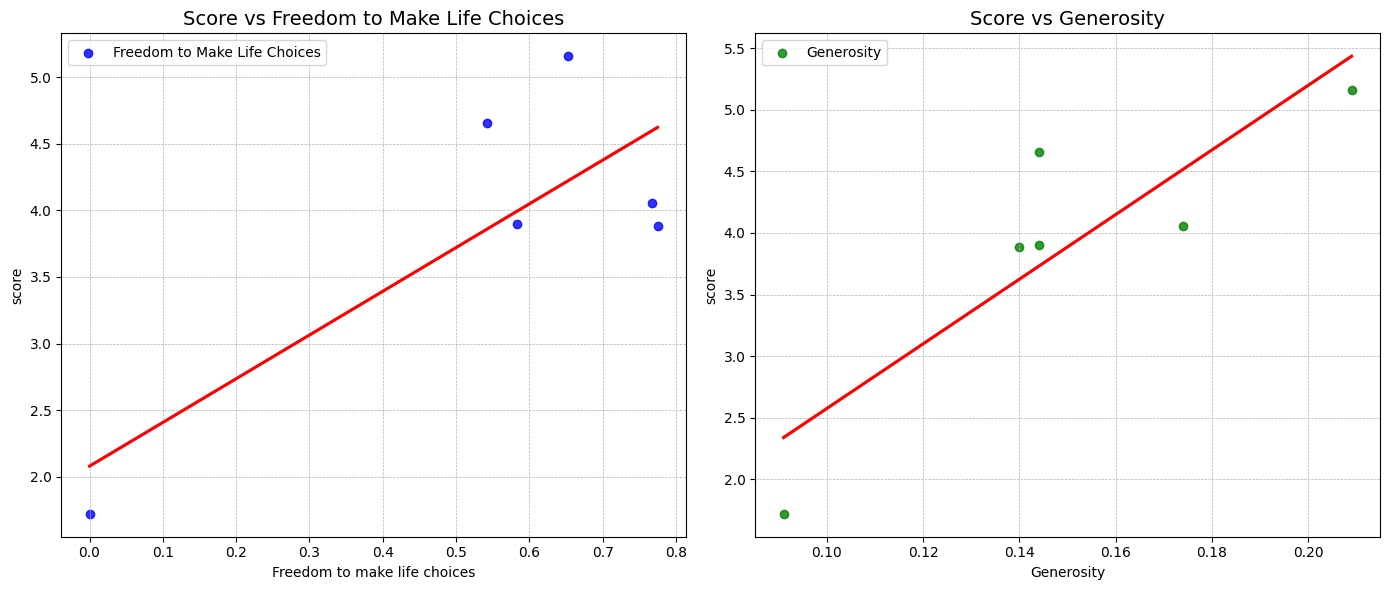

In [61]:
plt.figure(figsize=(14, 6))

# Plot 1: Scatter plot of Score vs Freedom to Make Life Choices with trendline
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None, label='Freedom to Make Life Choices')
plt.title('Score vs Freedom to Make Life Choices', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid
plt.legend(loc='upper left')  # Add legend

# Plot 2: Scatter plot of Score vs Generosity with trendline
plt.subplot(1, 2, 2)  # (rows, columns, position)
sns.regplot(x='Generosity', y='score', data=south_asian_data,
            scatter_kws={'color': 'green'}, line_kws={'color': 'red'}, ci=None, label='Generosity')
plt.title('Score vs Generosity', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid
plt.legend(loc='upper left')  # Add legend

# Show the plots
plt.tight_layout()
plt.show()

In [63]:
# Identification of strongest and weakest relationships between metrices and Score for South Asian Countries
# Calculate Pearson correlations
correlation_freedom = south_asian_data['score'].corr(south_asian_data['Freedom to make life choices'], method='pearson')
correlation_generosity = south_asian_data['score'].corr(south_asian_data['Generosity'])
correlation_gdp = south_asian_data['score'].corr(south_asian_data['Log GDP per capita'])
correlation_social_support = south_asian_data['score'].corr(south_asian_data['Social support'])
correlation_life_expectancy = south_asian_data['score'].corr(south_asian_data['Healthy life expectancy'])

# Print the correlations
print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_generosity}")
print(f"Correlation between Score and Log GDP per capita: {correlation_gdp}")
print(f"Correlation between Score and Social Support: {correlation_social_support}")
print(f"Correlation between Score and Healthy Life Expectancy: {correlation_life_expectancy}")


Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192
Correlation between Score and Log GDP per capita: 0.583969319428558
Correlation between Score and Social Support: 0.6974343971971297
Correlation between Score and Healthy Life Expectancy: 0.46154420075686


Generosity (0.87) and Freedom to Make Life Choices (0.80) show the strongest positive correlations with happiness, meaning that more generous and free societies tend to be happier.
Social Support (0.70) also has a strong positive correlation, emphasizing the importance of social connections for happiness.
Log GDP per capita (0.58) and Healthy Life Expectancy (0.46) show moderate positive correlations, indicating that while wealth and health contribute to happiness, they are less significant than social and personal factors.







**Task 5**

In [65]:
# Create a new column 'GDP-Score Gap' as the difference between 'Log GDP per capita' and 'score'
#Gap Analysis
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Display the updated DataFrame
print(south_asian_data.head())


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783             Medium   
107                      0.0

<ipython-input-65-e7ebd125e467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']


In [66]:
#Rank the South Asian countries by this gap in both ascending and descending order
# Rank by GDP-Score Gap in ascending order
ranked_ascending = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True)

# Rank by GDP-Score Gap in descending order
ranked_descending = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)

# Display the results
print("Ranking by GDP-Score Gap (Ascending Order):")
print(ranked_ascending[['Country name', 'GDP-Score Gap']].head(10))

print("\nRanking by GDP-Score Gap (Descending Order):")
print(ranked_descending[['Country name', 'GDP-Score Gap']].head(10))


Ranking by GDP-Score Gap (Ascending Order):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Ranking by GDP-Score Gap (Descending Order):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


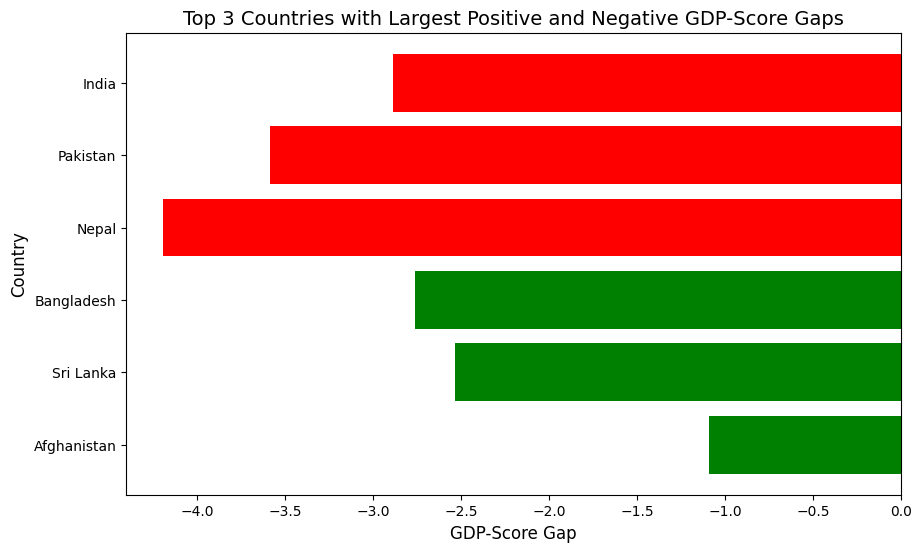

In [69]:
# Highlight the top 3 countries with the largest positive and negative gaps using a bar chart

top_positive_gaps = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False).head(3)

# Get the top 3 countries with the largest negative gaps
top_negative_gaps = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True).head(3)

# Combine the two DataFrames for plotting
highlighted_gaps = pd.concat([top_positive_gaps[['Country name', 'GDP-Score Gap']],
                               top_negative_gaps[['Country name', 'GDP-Score Gap']]])

# Set colors: green for positive gaps, red for negative gaps
colors = ['green'] * 3 + ['red'] * 3

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(highlighted_gaps['Country name'], highlighted_gaps['GDP-Score Gap'], color=colors)

# Adding titles and labels
plt.title("Top 3 Countries with Largest Positive and Negative GDP-Score Gaps", fontsize=14)
plt.xlabel("GDP-Score Gap", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the plot
plt.show()

The GDP-Score Gap in South Asian countries shows that having a high income doesn’t always mean people are happier, often because of things like income inequality or weak social support. Some countries with lower incomes are happier because they have strong communities and better social services. This gap shows that happiness depends on more than just money – things like social connections and health matter too.

**Problem 3**

In [70]:
# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset to include only Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Display the first few rows of the Middle Eastern DataFrame
print("Middle Eastern Countries DataFrame:")
print(middle_east_data)

# Optionally save the DataFrame to a CSV file for future use
middle_east_data.to_csv('Middle_East_Countries.csv', index=False)
print("\nMiddle Eastern DataFrame saved as 'Middle_East_Countries.csv'")


Middle Eastern Countries DataFrame:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     

In [72]:
#Calculate the mean, Standard deviation of the score for both South Asia and Middle East

# Calculate mean and standard deviation for South Asia
south_asia_mean = south_asian_data['score'].mean()
south_asia_std = south_asian_data['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Print the results
print("South Asia:")
print(f"Mean Score: {south_asia_mean}")
print(f"Standard Deviation: {south_asia_std}\n")

print("Middle East:")
print(f"Mean Score: {middle_east_mean}")
print(f"Standard Deviation: {middle_east_std}\n")

# Determine which region has higher average happiness score
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher happiness score on average.")
else:
    print("The Middle East has a higher happiness score on average.")


South Asia:
Mean Score: 3.895666666666667
Standard Deviation: 1.1770690152521504

Middle East:
Mean Score: 5.412100000000001
Standard Deviation: 1.5662011684327144

The Middle East has a higher happiness score on average.


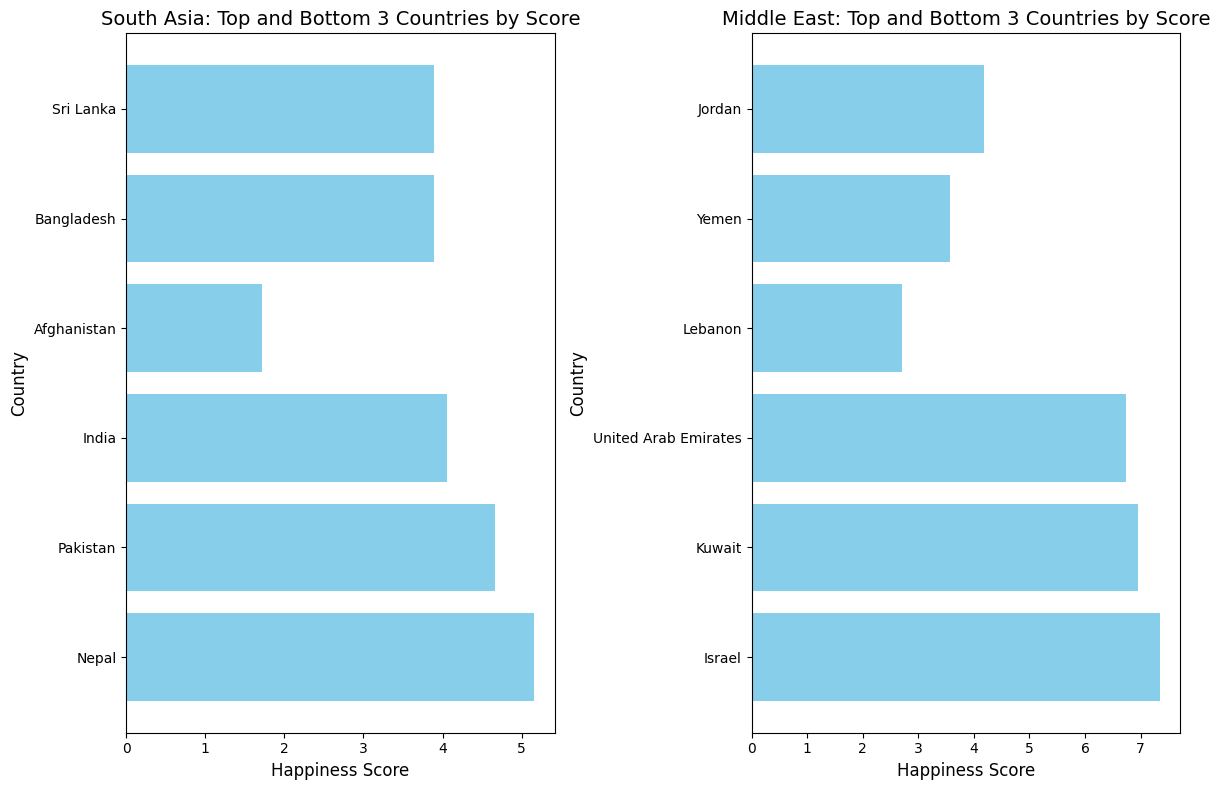

In [73]:
south_asia_top3 = south_asian_data.nlargest(3, 'score')
south_asia_bottom3 = south_asian_data.nsmallest(3, 'score')

# Identify top 3 and bottom 3 countries in the Middle East
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Combine results into one DataFrame for plotting
top_bottom_data = pd.concat([
    south_asia_top3.assign(Region="South Asia"),
    south_asia_bottom3.assign(Region="South Asia"),
    middle_east_top3.assign(Region="Middle East"),
    middle_east_bottom3.assign(Region="Middle East")
])

# Plotting
plt.figure(figsize=(12, 8))
regions = ['South Asia', 'Middle East']

for i, region in enumerate(regions, 1):
    # Filter data for the region
    region_data = top_bottom_data[top_bottom_data['Region'] == region]

    # Plot bar chart
    plt.subplot(1, 2, i)
    plt.barh(region_data['Country name'], region_data['score'], color='skyblue')
    plt.title(f"{region}: Top and Bottom 3 Countries by Score", fontsize=14)
    plt.xlabel("Happiness Score", fontsize=12)
    plt.ylabel("Country", fontsize=12)

plt.tight_layout()
plt.show()

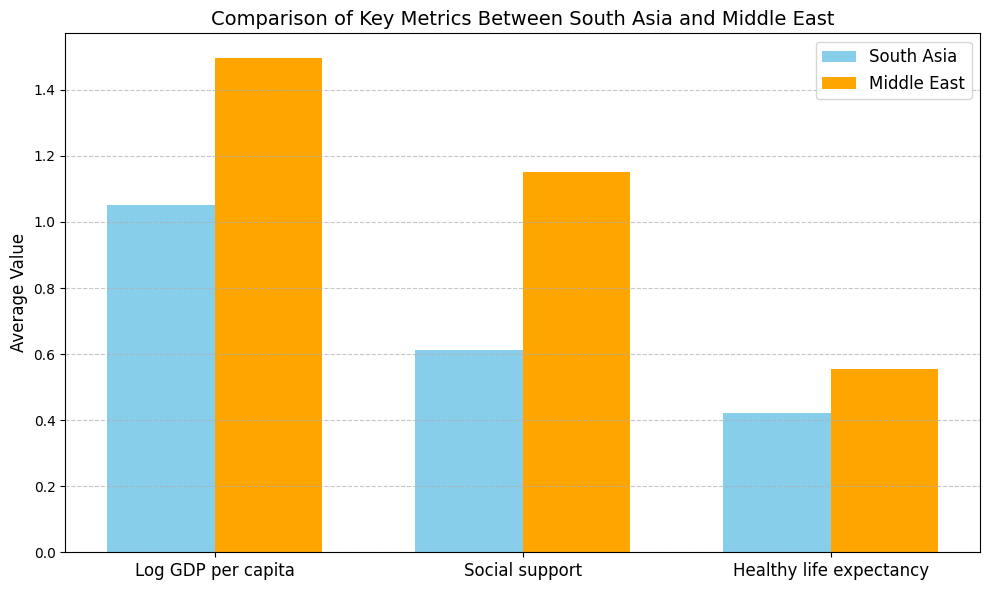

The largest disparity is in 'Social support' with a difference of 0.54.


In [74]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asian_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Create a grouped bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10, 6))

# Plot bars for each region
plt.bar(x - width/2, south_asia_means, width, label='South Asia', color='skyblue')
plt.bar(x + width/2, middle_east_means, width, label='Middle East', color='orange')

# Add titles, labels, and legend
plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=14)
plt.xticks(x, metrics, fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Identify metric with the largest disparity
disparities = abs(south_asia_means - middle_east_means)
largest_disparity_metric = disparities.idxmax()
largest_disparity_value = disparities.max()

print(f"The largest disparity is in '{largest_disparity_metric}' with a difference of {largest_disparity_value:.2f}.")

In [75]:
# Compute range (max - min) and coefficient of variation for South Asia
south_asia_range = south_asian_data['score'].max() - south_asian_data['score'].min()
south_asia_cv = south_asian_data['score'].std() / south_asian_data['score'].mean()

# Compute range (max - min) and coefficient of variation for Middle East
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

# Print results
print("South Asia:")
print(f"Range: {south_asia_range}")
print(f"Coefficient of Variation (CV): {south_asia_cv:.2f}\n")

print("Middle East:")
print(f"Range: {middle_east_range}")
print(f"Coefficient of Variation (CV): {middle_east_cv:.2f}\n")

# Determine region with greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("The Middle East has greater variability in happiness.")


South Asia:
Range: 3.4370000000000003
Coefficient of Variation (CV): 0.30

Middle East:
Range: 4.634
Coefficient of Variation (CV): 0.29

South Asia has greater variability in happiness.


In [76]:
# Calculate correlations for South Asia
south_asia_corr_freedom = south_asian_data['score'].corr(south_asian_data['Freedom to make life choices'])
south_asia_corr_generosity = south_asian_data['score'].corr(south_asian_data['Generosity'])

# Calculate correlations for Middle East
middle_east_corr_freedom = middle_east_data['score'].corr(middle_east_data['Freedom to make life choices'])
middle_east_corr_generosity = middle_east_data['score'].corr(middle_east_data['Generosity'])

# Print the results
print("South Asia:")
print(f"Correlation between Score and Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f"Correlation between Score and Generosity: {south_asia_corr_generosity:.2f}\n")

print("Middle East:")
print(f"Correlation between Score and Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f"Correlation between Score and Generosity: {middle_east_corr_generosity:.2f}\n")


South Asia:
Correlation between Score and Freedom to Make Life Choices: 0.80
Correlation between Score and Generosity: 0.87

Middle East:
Correlation between Score and Freedom to Make Life Choices: 0.86
Correlation between Score and Generosity: 0.63



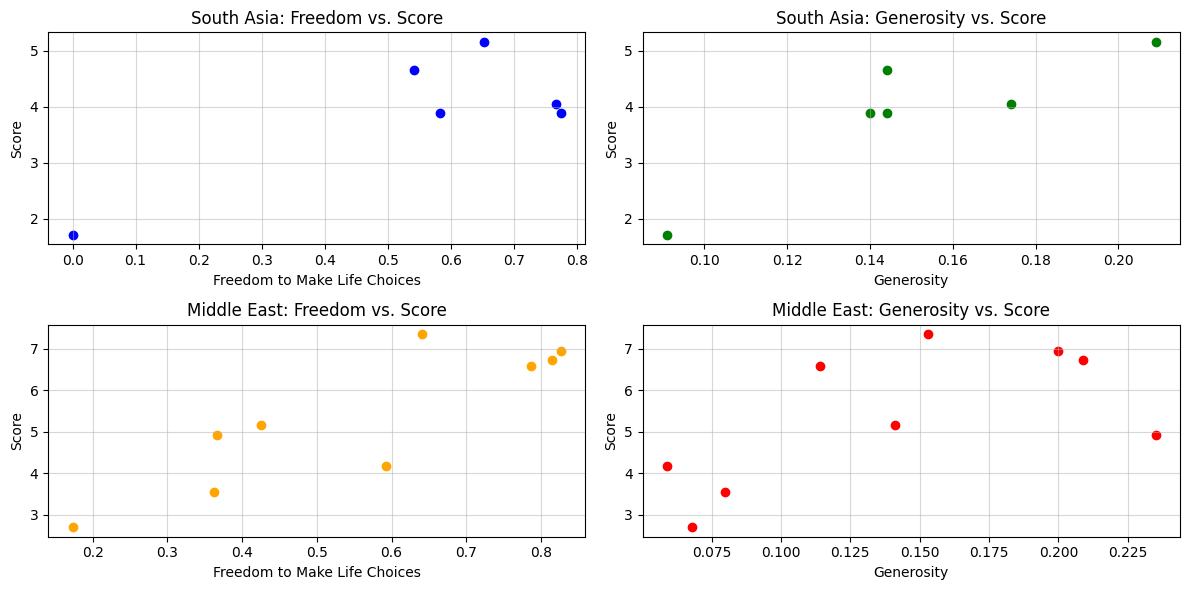

In [77]:
plt.figure(figsize=(12, 6))

# South Asia: Freedom to Make Life Choices vs. Score
plt.subplot(2, 2, 1)
plt.scatter(south_asian_data['Freedom to make life choices'], south_asian_data['score'], color='blue')
plt.title('South Asia: Freedom vs. Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(alpha=0.5)

# South Asia: Generosity vs. Score
plt.subplot(2, 2, 2)
plt.scatter(south_asian_data['Generosity'], south_asian_data['score'], color='green')
plt.title('South Asia: Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(alpha=0.5)

# Scatter plots for Middle East
# Middle East: Freedom to Make Life Choices vs. Score
plt.subplot(2, 2, 3)
plt.scatter(middle_east_data['Freedom to make life choices'], middle_east_data['score'], color='orange')
plt.title('Middle East: Freedom vs. Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(alpha=0.5)

# Middle East: Generosity vs. Score
plt.subplot(2, 2, 4)
plt.scatter(middle_east_data['Generosity'], middle_east_data['score'], color='red')
plt.title('Middle East: Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [78]:
# Function to identify outliers based on the 1.5×IQR rule
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for South Asia
south_asia_score_outliers = identify_outliers(south_asian_data, 'score')
south_asia_gdp_outliers = identify_outliers(south_asian_data, 'Log GDP per capita')

# Identify outliers for Middle East
middle_east_score_outliers = identify_outliers(middle_east_data, 'score')
middle_east_gdp_outliers = identify_outliers(middle_east_data, 'Log GDP per capita')

# Print results
print("South Asia Score Outliers:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nSouth Asia GDP Outliers:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nMiddle East GDP Outliers:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])


South Asia Score Outliers:
    Country name  score
142  Afghanistan  1.721

South Asia GDP Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East GDP Outliers:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


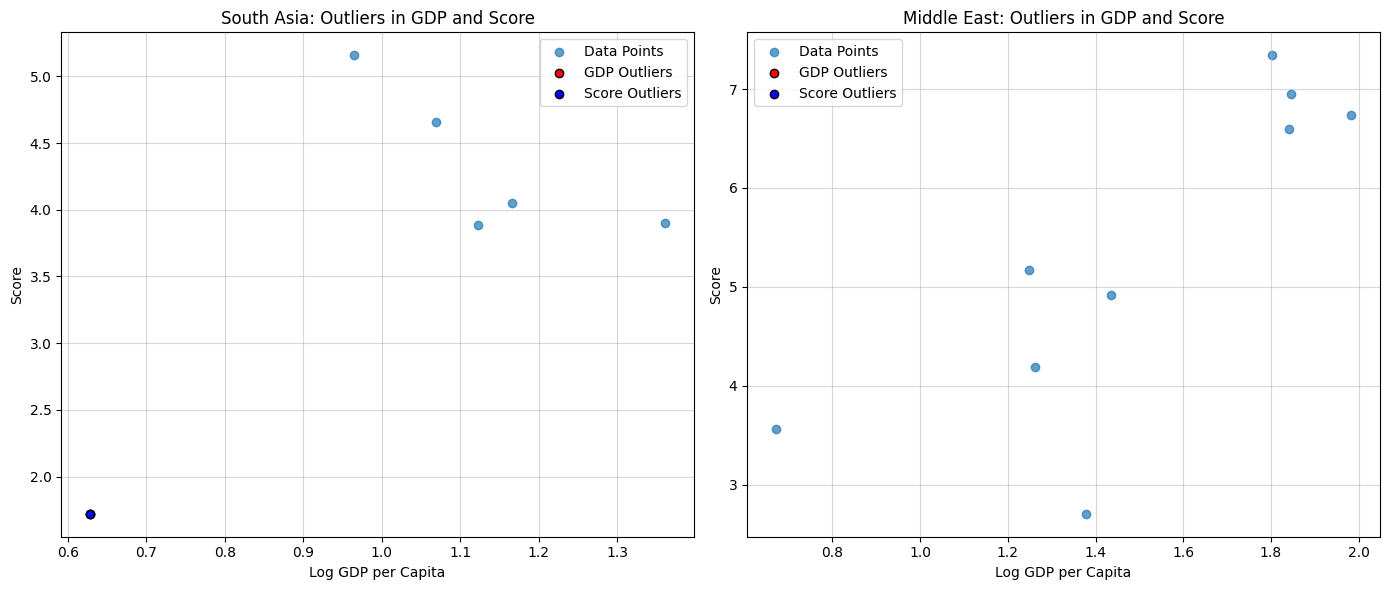

In [79]:
import matplotlib.pyplot as plt

# Scatter plot for South Asia
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(south_asian_data['Log GDP per capita'], south_asian_data['score'], label='Data Points', alpha=0.7)
plt.scatter(south_asia_gdp_outliers['Log GDP per capita'], south_asia_gdp_outliers['score'], color='red', label='GDP Outliers', edgecolor='black')
plt.scatter(south_asia_score_outliers['Log GDP per capita'], south_asia_score_outliers['score'], color='blue', label='Score Outliers', edgecolor='black')
plt.title('South Asia: Outliers in GDP and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid(alpha=0.5)

# Scatter plot for Middle East
plt.subplot(1, 2, 2)
plt.scatter(middle_east_data['Log GDP per capita'], middle_east_data['score'], label='Data Points', alpha=0.7)
plt.scatter(middle_east_gdp_outliers['Log GDP per capita'], middle_east_gdp_outliers['score'], color='red', label='GDP Outliers', edgecolor='black')
plt.scatter(middle_east_score_outliers['Log GDP per capita'], middle_east_score_outliers['score'], color='blue', label='Score Outliers', edgecolor='black')
plt.title('Middle East: Outliers in GDP and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


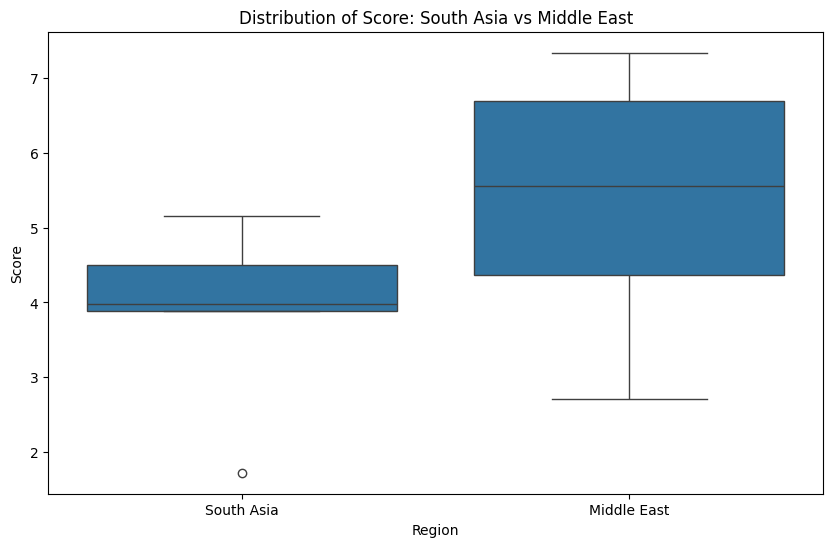

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_data.assign(Region='South Asia'), middle_east_data.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
